# Gene2vec: Neural word embeddings of genetic data

## Overview
Word2vec is a tool for learning continuous word embeddings from plain text data. Our adaptation of this tool -- Gene2Vec  -- aims to construct syntactic and semantic relationships from amino acid sequence data. Using these relationships, we can perform some rudimentary protein family classification. 


## Word2Vec Explained

### The Skip-gram Model

"<figure><img src='skipgram.png' alt='Skip-gram Model' width="300"/> <figcaption><center><i>The Skip-gram model.</i></center></figcaption> </figure>"

As shown in the figure, the output layer consists of $C$ multinomial distributions, each computed as 

$$p \left( w_{c,j} = w_{O,c} \mid w_I \right) = y_{c,j} = \frac{\exp{\left( u_{c,j} \right) }}{\sum_{j=1}^V \exp{\left( u_{j'} \right) }}$$

$$\frac{1}{T} \sum_{t=1}^T \sum_{-c\leq j\leq c,\; j \neq 0} \log p(w_{t+j}\mid w_t)$$


$$p(w_O | w_I)=\frac{\exp{\left(v'_{w_O}{} ^\top v_{w_I}\right)}}{\sum_{w=1}^W \exp{\left( v'_{w} {} ^\top v_{w_t}\right)}}$$

#### Loss function
(self note: from word2vec Parameter Learning Explained)


$$ \begin{align} E &= -\log p(w_{O,1}, w_{O,2},..., w_{O,C}\mid w_I) \\  &= -\log \prod_{c=1}^C \frac{\exp{\left(u_{c,j^*_c}\right)}}{\sum_{j'=1}^V \exp(u_{j'})} \\ &= -\sum_{c=1}^C u_{j^*_c} + C \cdot \log \sum_{j'=1}^V \exp \left( u_{j'} \right) \end{align}$$

### Hierarchical Softmax 
$$p\left(w \mid w_I\right) = \prod_{j=1}^{L(w)-1} \sigma \left( [[ n(w,j+1) = \text{ch}(n(w,j)) ]] \cdot v'_{n(w,j)} {}^\top v_{w_I} \right) \text{ where } [[x]] = \begin{cases} 1 &\text{if } x \text{ is true} \\ -1 &\text{otherwise} \end{cases}$$
### Negative Sampling

$$ \log \sigma \left( v'_{w_O}{} ^\top v_{w_I} \right) + \sum_{i=1}^k \mathbb{E}_{w_i} \sim P_n(w)\left[ \log \sigma \left( -v'_{w_i}{} ^\top v_{w_I} \right) \right] $$

### Learning Phrases
$$ \text{score}(w_i,w_j)=\frac{\text{count}(w_iw_j)-\delta}{\text{count}(w_i) \times \text{count}(w_j)} $$


## Word2Vec Examples

loading
loaded
[ 0.19379273  0.14548096]


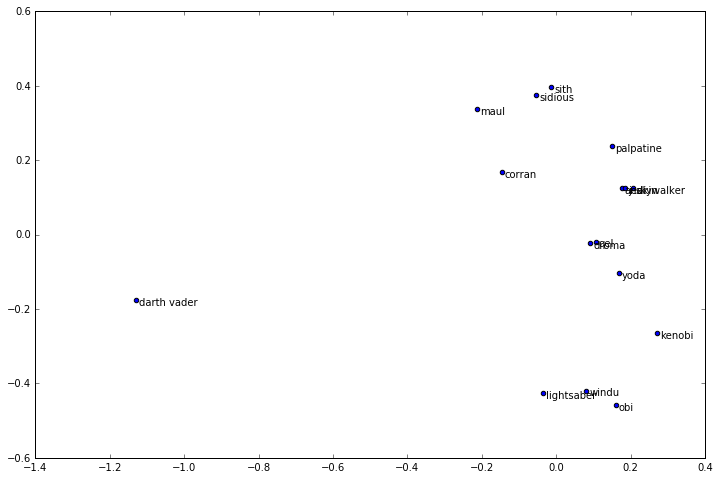

In [4]:
%matplotlib inline
import visword2vec
visword2vec.visWord2Vec('./text8.bin').plot('darth vader')

## Gene2Vec Examples

loading
loaded
[ 0.20882246  0.09831414]


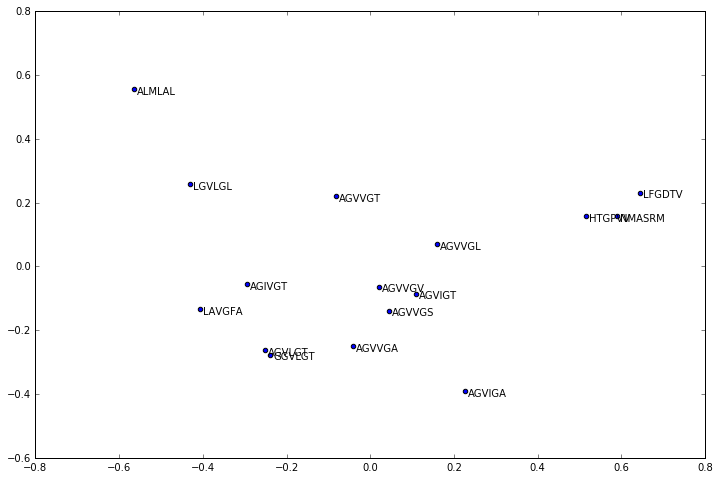

In [5]:
import visword2vec
visword2vec.visWord2Vec('protein_6-grams.bin').plot('AGVVGT')

## References
Goldberg, Y., & Levy, O. (2014). [word2vec Explained](http://arxiv.org/pdf/1411.2738v3.pdf): deriving Mikolov et al.’s negative sampling word-embedding method. arXiv:1402.3722 [cs, stat].

T. Mikolov, I. Sutskever, K. Chen, G. Corrado, and J. Dean. [Distributed Representations of Words and Phrases and their Compositionality](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf). In Advances on Neural Information Processing Systems, 2013c

Asgari, E. and Mofrad, M.R.K. (2015) [Continuous Distributed Representation of Biological Sequences for Deep Proteomics and Genomics](http://arxiv.org/pdf/1503.05140.pdf). PLoS One, 10, e0141287.
